## tracking the detected pupil



In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
np.set_printoptions(precision=2, suppress=True)
# define plots to be inserted interactively
import matplotlib.pyplot as plt
%matplotlib inline


## and now... let's calibrate

we grab 42 frames. why 42? I recommend to not move the head (hold them in your hands) and to look at the led of your webcam. when it's lit, move your eyes evenly on the screen.

In [4]:
%%writefile calibration_fixation.py
import cv2
import time
from LeCheapEyeTracker import Camera, Canvas
from vispy import app
import numpy as np

N_frame = 42
cam = Camera()
img0 = cam.grab()
def stim(t):
    img0 = cam.grab()
    H, W, three = img0.shape
    img = img0.copy()
    img = cv2.circle(img, (W//2, H//2), 12, (0,0,255), -1)
    return img

screen = Canvas(cam, (stim, np.linspace(0, 3., 100)))
app.run()

cam.close()

Overwriting calibration_fixation.py


In [5]:
%run calibration_fixation.py

  File "/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/site-packages/traitlets/config/application.py", line 592, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 403, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 151, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/site-packages/tornado/ioloop.py", line 866, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/site-packages/tornado/sta

In [6]:
%%writefile calibration_horizontal.py
import cv2
import time
from LeCheapEyeTracker import Camera, Canvas
from vispy import app
import numpy as np

N_frame = 42
cam = Camera()
img0 = cam.grab()
H, W, three = img0.shape
img0 = np.zeros_like(img0)
timeline = np.linspace(0, 8., 100)
def stim(t):
    img = img0.copy()
    pos = W/2 + W/2 * np.sin(2*np.pi*t)
    img = cv2.circle(img, (int(pos), H//2), 12, (0,0,255), -1)
    return img

screen = Canvas(cam, (stim, timeline))
app.run()
cam.close()
print(screen.cam.eye_pos)


Overwriting calibration_horizontal.py


In [7]:
%run calibration_horizontal.py

  File "/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/site-packages/traitlets/config/application.py", line 592, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 403, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 151, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/site-packages/tornado/ioloop.py", line 866, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/site-packages/tornado/sta

[[(115.0, 60.0), 462128.673825794], [(120.0, 61.0), 462128.949590827], [(125.0, 55.0), 462129.229175035], [(125.0, 57.0), 462129.521325979], [(131.0, 67.0), 462129.780432283], [(133.0, 68.0), 462130.066128443], [(146.0, 69.0), 462130.347241843], [(144.0, 69.0), 462130.608651181], [(144.0, 69.0), 462130.887025949], [(144.0, 68.0), 462131.143161019], [(142.0, 69.0), 462131.397930779], [(143.0, 67.0), 462131.653639775], [(131.0, 68.0), 462131.909277317], [(128.0, 66.0), 462132.183367059], [(128.0, 66.0), 462132.460630851], [(130.0, 67.0), 462132.748335329], [(130.0, 67.0), 462133.023465533], [(126.0, 66.0), 462133.280624223], [(111.0, 76.0), 462133.539483138], [(118.0, 77.0), 462133.793910035], [(113.0, 78.0), 462134.051298059], [(116.0, 80.0), 462134.326139823], [(117.0, 79.0), 462134.597401995], [(128.0, 58.0), 462134.880556771], [(130.0, 58.0), 462135.14360195], [(121.0, 81.0), 462135.398946025], [(120.0, 80.0), 462135.65351838], [(119.0, 79.0), 462135.906153882], [(119.0, 79.0), 46213

462128.673825794 462136.414904311
[ 0.    0.22  0.44  0.63  0.78  0.9   0.98  1.    0.97  0.91  0.8   0.66
  0.49  0.29  0.07 -0.16 -0.38 -0.56 -0.72 -0.85 -0.94 -0.99 -1.   -0.95
 -0.86 -0.73 -0.58 -0.4  -0.21 -0.  ]


(0.0, 7.7410785169922747, -1.2543352601156073, 1.0)

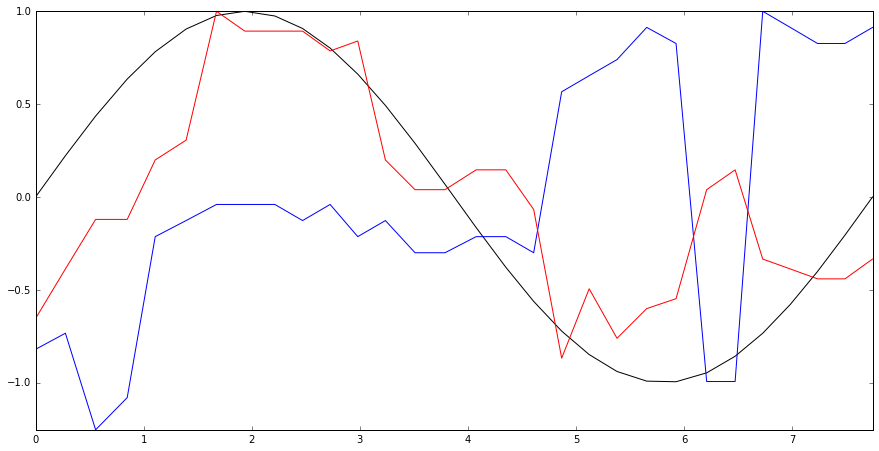

In [8]:

pos_true = []
timeline = []
pos_h, pos_w = [], []
t_max = screen.cam.eye_pos[-1][1]
t_min = screen.cam.eye_pos[0][1]
print(t_min, t_max)
for pos, t0 in screen.cam.eye_pos:
    pos_true.append(np.sin(2*np.pi*(t0-t_min)/(t_max-t_min)))
    pos_w.append(pos[0])
    pos_h.append(pos[1]) 
    timeline.append(t0-t_min)

pos_true = np.array(pos_true)
print(pos_true)
pos_true /= pos_true.max()

pos_w = np.array(pos_w)
pos_w -= pos_w.mean()
pos_w /= pos_w.max()

pos_h = np.array(pos_h)
pos_h -= pos_h.mean()
pos_h /= pos_h.max()

fig, axs = plt.subplots(1, 1, figsize=(15, 7.5))
axs.plot(timeline, pos_true, 'k')
axs.plot(timeline, pos_h, 'b')
axs.plot(timeline, pos_w, 'r')
axs.axis('tight')

(-0.9954350138153707, 1.0, -1.2543352601156073, 1.0)

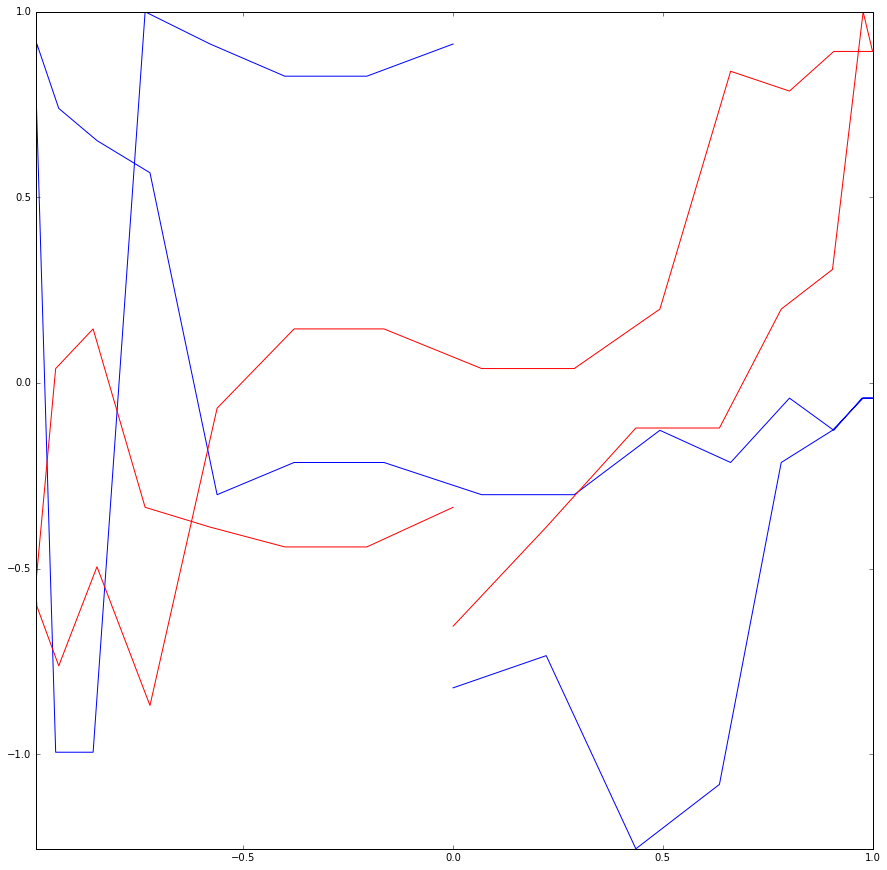

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(15, 15))
axs.plot(pos_true, pos_h, 'b')
axs.plot(pos_true, pos_w, 'r')
axs.axis('tight')

Wow!